In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("wine-clustering.csv")  
df_numeric = df.iloc[:, 1:] 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [4]:
df.isna().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
len(df)

178

In [6]:
df.dropna(inplace=True) 
df.isna().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

Feature Extraction & Engineering

In [8]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'object'] 
categorical_cols

[]

In [11]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('-'*50)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [14]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object'] 

numeric_cols


['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

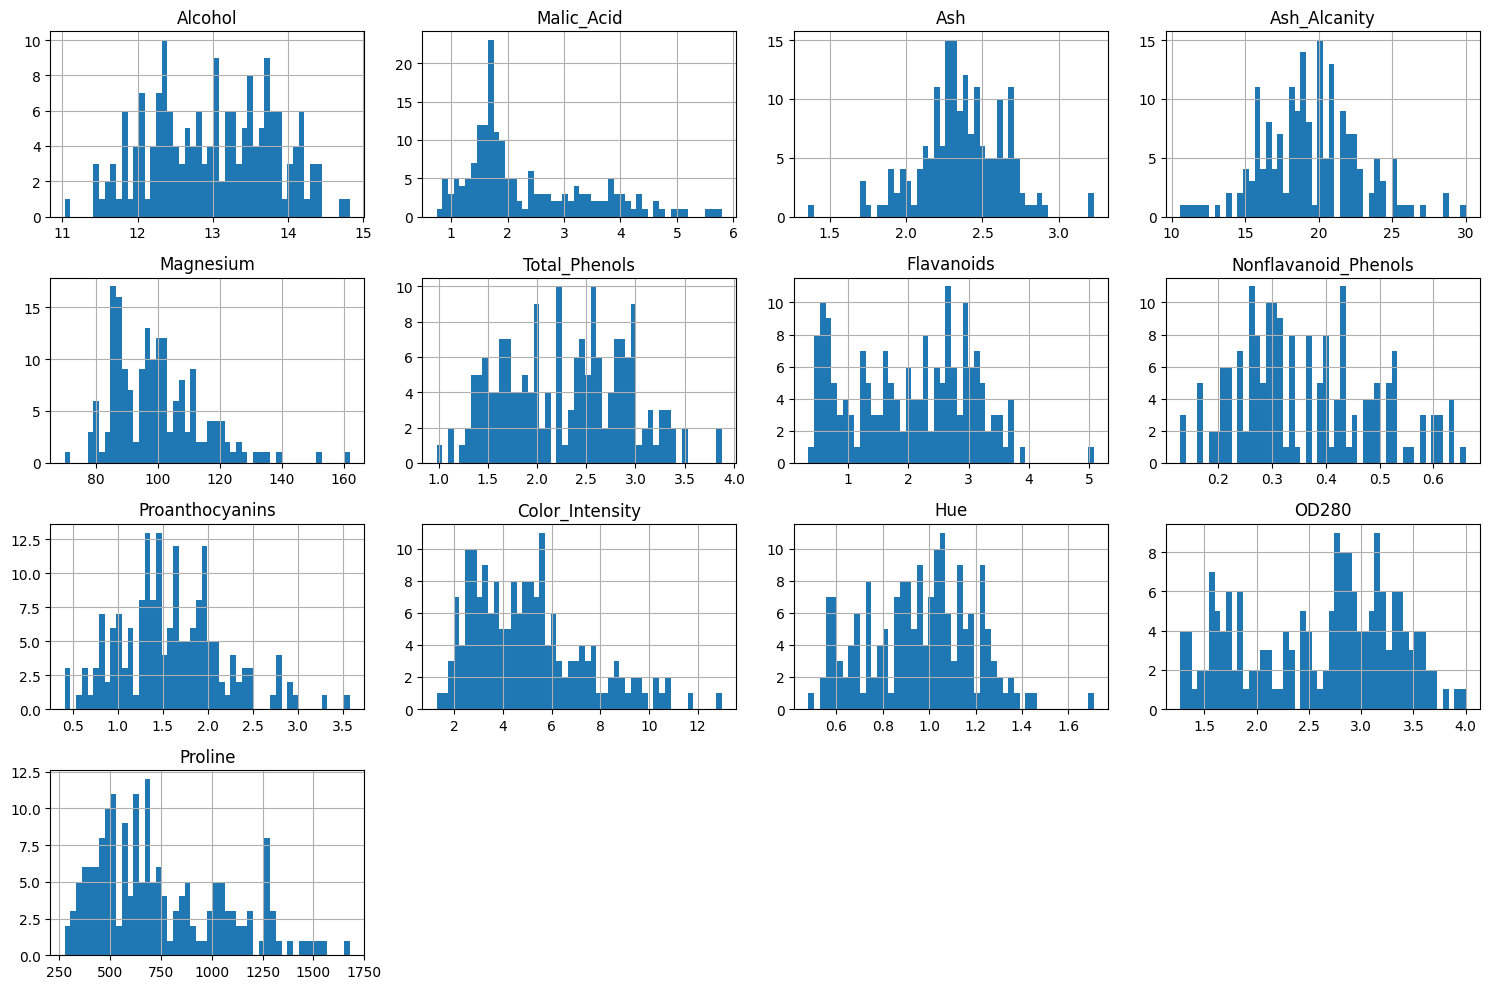

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()




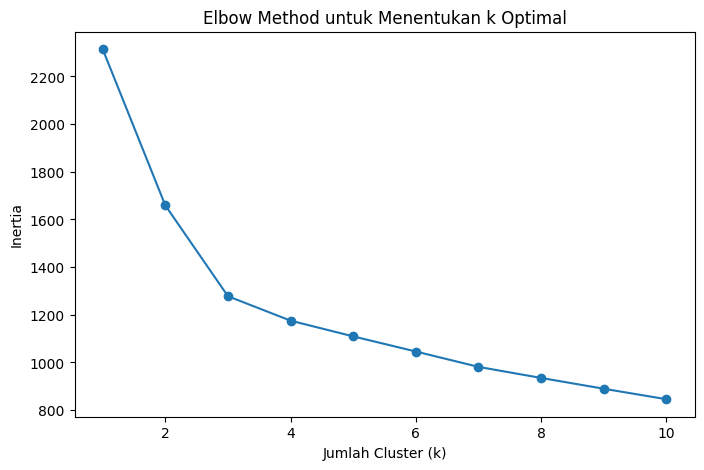

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

df_scaled['Cluster_KMeans'].value_counts()

Cluster_KMeans
0    65
2    62
1    51
Name: count, dtype: int64

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=1.5, min_samples=5)
df_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

df_scaled['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
-1    178
Name: count, dtype: int64

In [23]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
df_scaled['Cluster_Agglomerative'] = agg_clustering.fit_predict(df_scaled)

df_scaled['Cluster_Agglomerative'].value_counts()

Cluster_Agglomerative
0    64
1    61
2    53
Name: count, dtype: int64

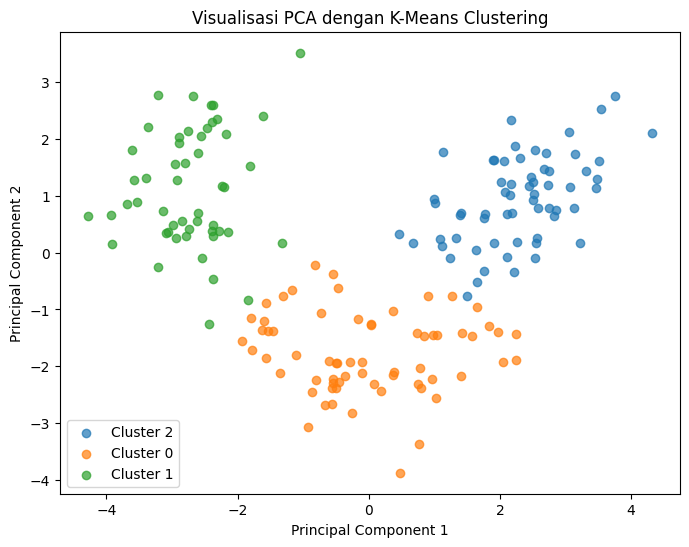

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['Cluster_KMeans', 'Cluster_DBSCAN', 'Cluster_Agglomerative']))

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster_KMeans'] = df_scaled['Cluster_KMeans']
df_pca['Cluster_DBSCAN'] = df_scaled['Cluster_DBSCAN']
df_pca['Cluster_Agglomerative'] = df_scaled['Cluster_Agglomerative']

plt.figure(figsize=(8, 6))
for cluster in df_pca['Cluster_KMeans'].unique():
    subset = df_pca[df_pca['Cluster_KMeans'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi PCA dengan K-Means Clustering')
plt.legend()
plt.show()

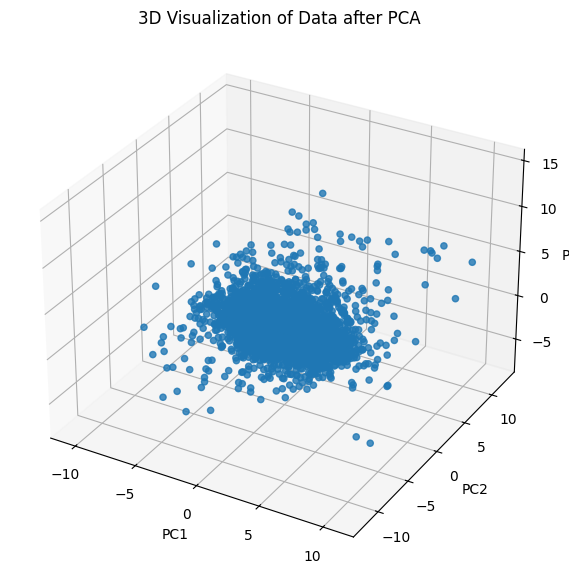

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

df = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.8)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D Visualization of Data after PCA")

plt.show()